<IPython.core.display.Javascript object>


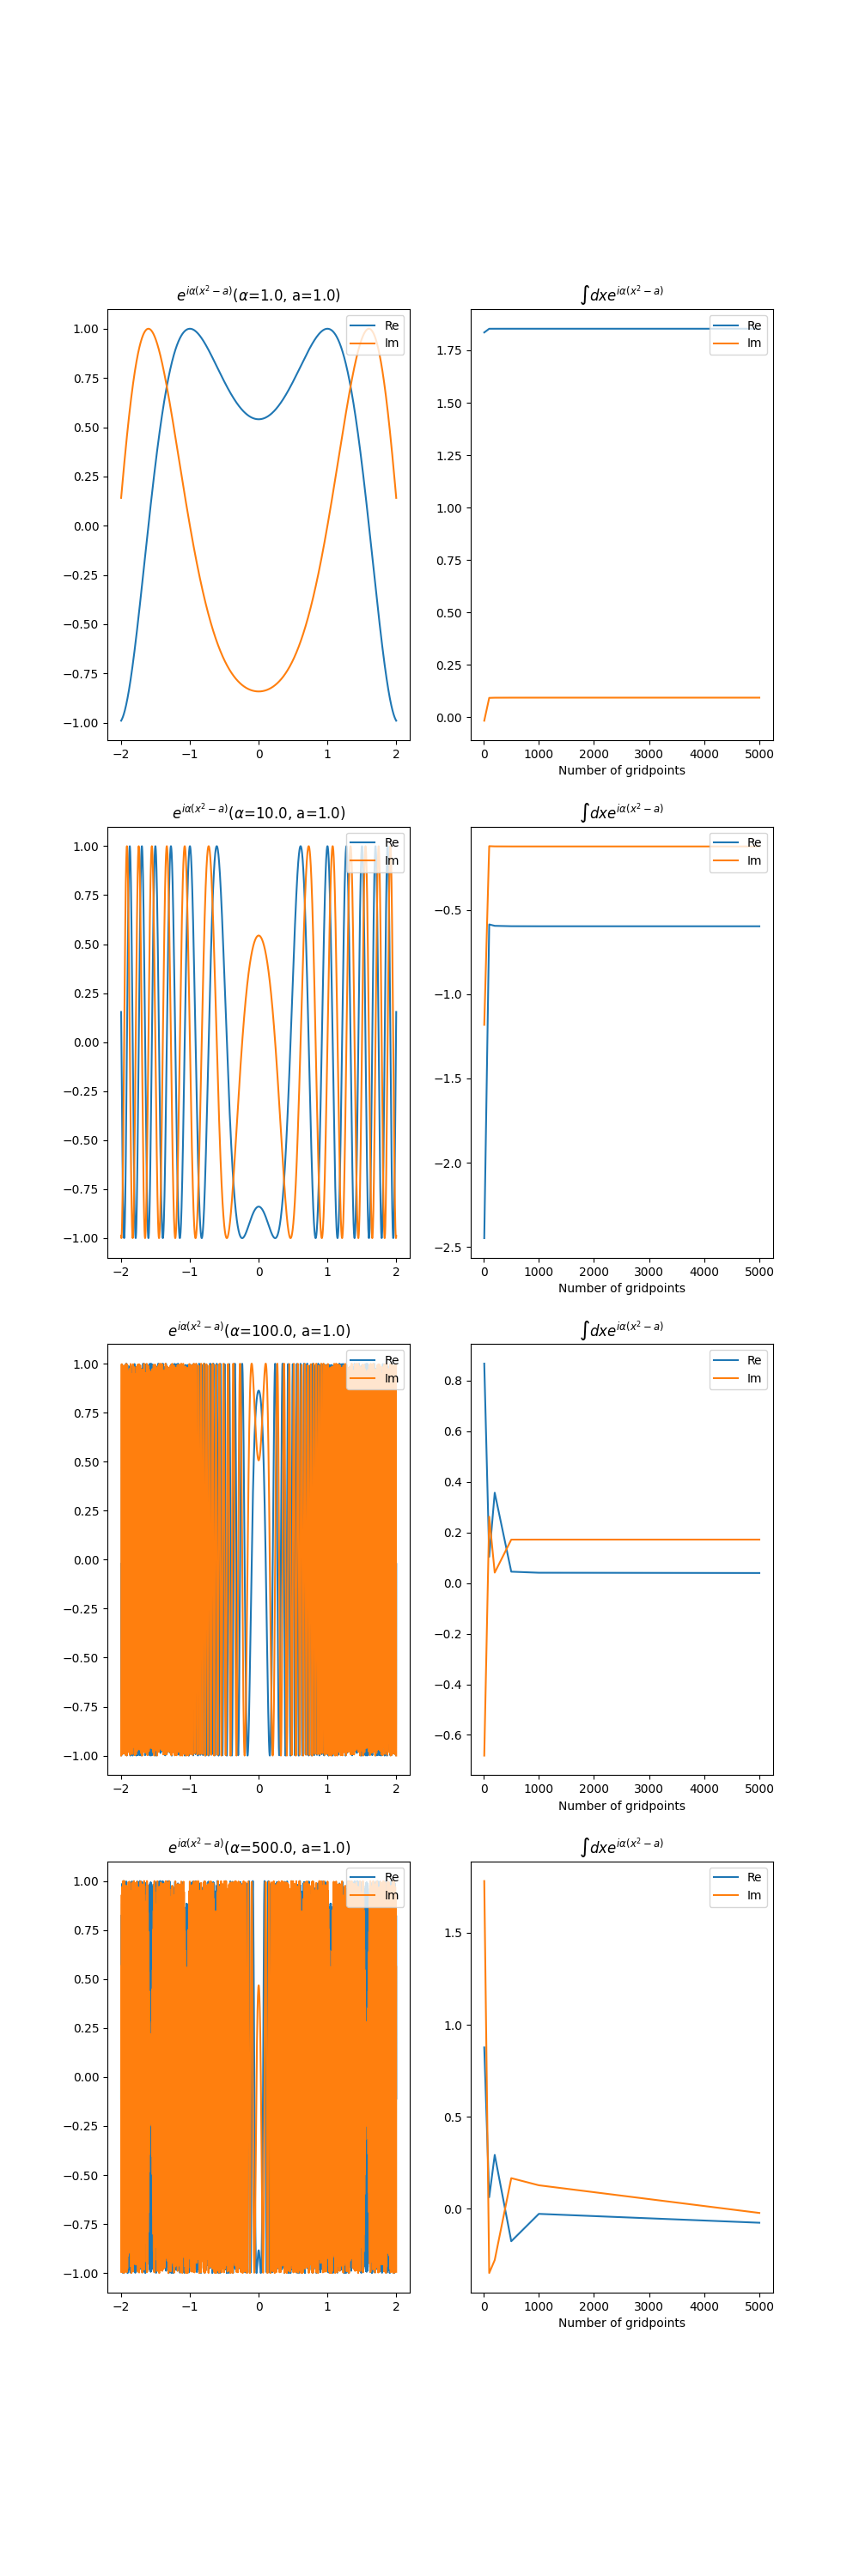

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x=np.linspace(-2,2,2000)

def f_x(x,alpha,a):
    return np.exp(1.j*alpha*(x**2-a))

def int_f(x,alpha,a,Ngrid):
    
    dx=(x[-1]-x[0])/Ngrid
    I=0.+0.j
    for n in range(Ngrid):
        I += f_x(x[0]+n*dx,alpha,a)*dx
        
    return I

    

alpha=10.0
a=1.0
# plt.plot(x,np.real(f_x(x,alpha,a)))
# plt.plot(x,np.imag(f_x(x,alpha,a)))

alpha_range=[1.0,10.0,100.0,500.0]
Ngrid_range=[10,100,200,500,1000,5000]

If_lst=[]
sp_lst=[]

# fig=plt.figure()
num_plots =len(alpha_range)
fig,axs=plt.subplots(num_plots,2,figsize=(10,30))




plt.title(r"$e^{i\alpha(x^2-a)}$")
for i,alpha in enumerate(alpha_range):
    If_lst=[]
    # look at convergence of numerical integration
    for num_points in Ngrid_range:
        If= int_f(x,alpha,a,num_points)
        If_lst.append(If)
    
#     ax=fig.add_subplot(num_plots*100+20+2*i+1)
    axs[i][0].plot(x,np.real(f_x(x,alpha,a)),label="Re")
    axs[i][0].plot(x,np.imag(f_x(x,alpha,a)),label="Im")
    axs[i][0].set_title(r"$e^{i\alpha(x^2-a)}$"+r"($\alpha$="+str(alpha)+", a="+str(a)+")")
    axs[i][0].legend(loc="upper right")

    
#     ax2=fig.add_subplot(num_plots*100+20+2*i+2)
    axs[i][1].plot(Ngrid_range,np.real(If_lst),label="Re")
    axs[i][1].plot(Ngrid_range,np.imag(If_lst),label="Im")
    axs[i][1].set_xlabel("Number of gridpoints")
    axs[i][1].set_title(r"$ \int dx e^{i\alpha(x^2-a)}$")
    axs[i][1].legend(loc="upper right")



alpha=1.0
If=1.8528987529543033+0.09197590468302451i
SP_approx=-0.37745896303183013+-1.7317959997692363i

alpha=10.0
If=-0.5975341785414628+-0.12401456914070891i
SP_approx=-0.11693813765709338+0.5481648815094505i

alpha=100.0
If=0.03962417263215709+0.17165566010768296i
SP_approx=0.17153916501658012+-0.044612121685842596i

alpha=500.0
If=-0.07674999571754468+-0.023210825022061177i
SP_approx=-0.023321105540920446+0.07575824274314207i

alpha=1000.0
If=0.055170288054384925+-0.009996232895819987i
SP_approx=-0.010483019101570054+-0.055060865994877986i

alpha=2000.0
If=0.01565956275430818+-0.0365878428911211i
SP_approx=-0.03636235399123617+-0.01576627854031914i

alpha=5000.0
If=-0.014680669758944083+0.02029749771733891i
SP_approx=0.02025267531106066+0.014769823068090986i

alpha=10000.0
If=-0.01580385342631391+-0.008073431165984336i
SP_approx=-0.00810318949799186+0.01576380618120553i



<IPython.core.display.Javascript object>


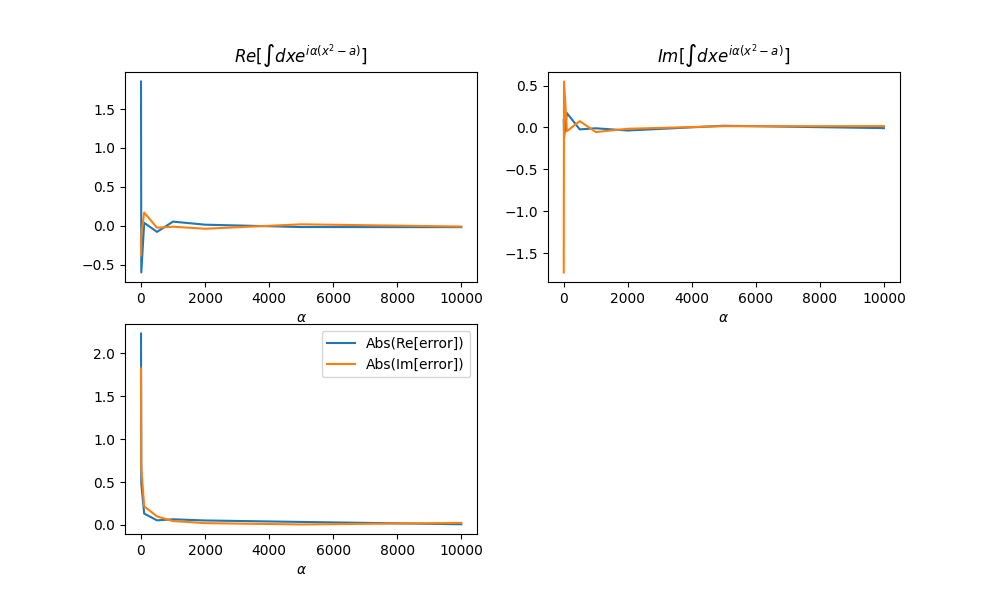

In [2]:
alpha_range=[1.0,10.0,100.0,500.0]
alpha_range=[1.0,10.0,100.0,500.0,1000.0,2000.0,5000.0,10000.0]

If_lst=[]
sp_lst=[]

for alpha in alpha_range:
    Ngrid=100*int(alpha)
    If= int_f(x,alpha,a,Ngrid)
    If_lst.append(If)
    print("alpha=" + str(alpha))
    print("If={}+{}i".format(np.real(If),np.imag(If)))

    sp_approx=np.sqrt(2.*np.pi/(2.j*alpha))*np.exp(-1.j*alpha*a)
    sp_lst.append(sp_approx)
    print("SP_approx={}+{}i".format(np.real(sp_approx),np.imag(sp_approx)))
    print()

fig2=plt.figure()
fig2.set_size_inches(10,6)

ax1=fig2.add_subplot(221)
ax1.set_title(r"$ Re[\int dx e^{i\alpha(x^2-a)}]$")
ax1.set_xlabel(r"$\alpha$")
plt.plot(alpha_range,np.real(If_lst), label="Numerical integration")
plt.plot(alpha_range,np.real(sp_lst), label="Stationary phase approx")
ax2=fig2.add_subplot(222)
ax2.set_xlabel(r'$\alpha$')
ax2.set_title(r"$ Im[\int dx e^{i\alpha(x^2-a)}]$")

plt.plot(alpha_range,np.imag(If_lst), label="Numerical integration")
plt.plot(alpha_range,np.imag(sp_lst), label="Stationary phase approx")


ax2=fig2.add_subplot(223)
ax2.set_xlabel(r'$\alpha$')
# ax2.set_title("error")

plt.plot(alpha_range,np.abs(np.real(np.array(If_lst)-np.array(sp_lst))), label="Abs(Re[error])")

plt.plot(alpha_range,np.abs(np.imag(np.array(If_lst)-np.array(sp_lst))), label="Abs(Im[error])")


plt.legend()